In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [3]:
X_train = pd.read_table("X_train.txt", delimiter = " ", header = None)
X_train.drop(0, axis = 1, inplace = True)
X_test = pd.read_table("X_test.txt", delimiter = " ", header = None)
X_test.drop(0, axis = 1, inplace = True)
Y_train = pd.read_table("y_train.txt", header = None, names = ['label'])
Y_test = pd.read_table("y_test.txt", header = None)


In [4]:
X_train.shape

(7352, 561)

In [5]:
#y_train = pd.DataFrame(Y_train, columns = ['label'])
print(Y_train)

      label
0         5
1         5
2         5
3         5
4         5
...     ...
7347      2
7348      2
7349      2
7350      2
7351      2

[7352 rows x 1 columns]


In [6]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
print(scaled_x_train)

[[ 0.20064157 -0.0636826  -0.41962845 ... -0.68721921  0.40794614
  -0.00756789]
 [ 0.05594788  0.03148567 -0.25390836 ... -0.694138    0.40911698
   0.00787517]
 [ 0.07351535 -0.04341648 -0.07629468 ... -0.702239    0.4102883
   0.02650234]
 ...
 [-0.01566765  0.0167814   1.13222107 ... -0.56584847  0.64059683
   0.34870928]
 [ 0.21586648 -0.02812252 -0.86770988 ... -0.57766781  0.63147758
   0.29327564]
 [ 1.09620157  0.12919873 -1.67268082 ... -0.57392691  0.63274259
   0.33396081]]


In [7]:
scaled_x_train.shape

(7352, 561)

In [27]:
pca = PCA(n_components = 2)
plot_x_train = pca.fit_transform(scaled_x_train)
plot_x_train = pd.DataFrame(plot_x_train, columns = ['pc1','pc2'])

Text(0.5, 1.0, '2d scatterplot')

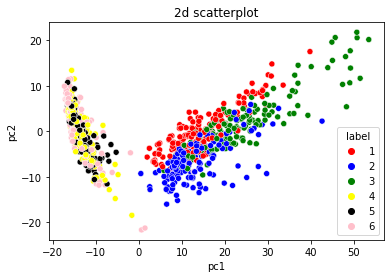

In [35]:
scatterx = pd.concat([plot_x_train, Y_train], axis=1)
scatterx = scatterx.sample(n = 1000)
#print(scatterx)
sns.scatterplot(x=scatterx.pc1,y=scatterx.pc2,hue=scatterx.label, palette =['red','blue','green','yellow','black','pink'])
plt.title('2d scatterplot')

In [31]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [                
        tf.keras.Input(shape=(561,)),
        Dense(64, activation = "relu"),
        Dense(32, activation = "relu"),
        Dense(7, activation = "softmax") 
    ], name = "my_model" 
)

In [32]:
[layer1, layer2, layer3] = model.layers


In [33]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    scaled_x_train,Y_train,
    batch_size=64,
    epochs=40
)

Epoch 1/40
115/115 [==============================] - 1s 2ms/step - loss: 0.4574 - sparse_categorical_accuracy: 0.8324
Epoch 2/40
115/115 [==============================] - 0s 2ms/step - loss: 0.1091 - sparse_categorical_accuracy: 0.9634
Epoch 3/40
115/115 [==============================] - 0s 2ms/step - loss: 0.0855 - sparse_categorical_accuracy: 0.9679
Epoch 4/40
115/115 [==============================] - 0s 2ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9766
Epoch 5/40
115/115 [==============================] - 0s 2ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9833
Epoch 6/40
115/115 [==============================] - 0s 2ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9837
Epoch 7/40
115/115 [==============================] - 0s 2ms/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9868
Epoch 8/40
115/115 [==============================] - 0s 2ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9879
Epoch 9/40
115/115 [============================

In [34]:
scaled_x_test = scaler.transform(X_test)
Yhat = model.predict(scaled_x_test)
print(Yhat)

[[1.0599513e-09 2.2901410e-11 3.5997896e-09 ... 4.5113125e-11
  1.0000000e+00 4.3154325e-09]
 [7.0623962e-08 2.3939725e-10 8.9952931e-07 ... 2.5062822e-04
  9.9974841e-01 4.2691386e-08]
 [1.3315301e-08 6.5514277e-10 1.6198679e-07 ... 1.0715325e-07
  9.9999976e-01 2.4480313e-08]
 ...
 [1.5757069e-08 2.0173712e-08 9.9999988e-01 ... 6.5182268e-09
  1.5309422e-09 8.8966534e-10]
 [1.1290228e-07 3.0981550e-06 9.9999332e-01 ... 2.6603630e-07
  2.0491060e-09 5.9334511e-08]
 [1.0168569e-06 2.0237414e-03 9.9791235e-01 ... 1.7760804e-06
  4.6961421e-07 1.6099879e-07]]


In [35]:
result = model.evaluate(scaled_x_test, Y_test, batch_size=128)
print(result)

24/24 [==============================] - 0s 2ms/step - loss: 0.2472 - sparse_categorical_accuracy: 0.9491
[0.247186079621315, 0.9491007924079895]


In [36]:
model.evaluate(scaled_x_train, Y_train)

230/230 [==============================] - 0s 1ms/step - loss: 1.4865e-04 - sparse_categorical_accuracy: 1.0000


[0.000148652950883843, 1.0]